#CIS545 Homework 1: Data Wrangling and Cleaning

Hello future data scientists and welcome to CIS 545! In this homework, you will familiarize yourself with Pandas 🐼! The cutest animal and one of the essential libraries for Data Science.

This homework will focus on Uber and AirBnB data so that you can put this on your resume and pass those resume buzz word detectors! It will be broken into 3 sections:

1. Working with Uber Data

2. Working with Airbnb Data

3. Working on a merged/joined version of the two (More on this later...)

**Note: Before starting, I highly recommend you click on the "Copy To Drive" option in the top bar. Once you click on that, make sure you are working on that version of the notebook so that your work is saved** 

Run the following two cells to setup the notebook

In [0]:
%%capture
!pip3 install penngrader
!pip3 install py_stringsimjoin
!pip install python-Levenshtein

from penngrader.grader import *

#Import neccessary libraries
!pip install geocoder
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
from datetime import datetime
import time
import geocoder
import py_stringsimjoin as ssj
import py_stringmatching as sm
from Levenshtein import distance
from difflib import SequenceMatcher
import requests
from lxml import html

In [2]:
!wget https://cis545hw1data.s3.amazonaws.com/airbnb_data_start.csv
!wget https://cis545hw1data.s3.amazonaws.com/airbnb_zipcode.csv
!wget https://cis545hw1data.s3.amazonaws.com/uber_data_start.csv
!wget https://cis545hw1data.s3.amazonaws.com/zillow_data_start.csv

--2020-02-07 05:22:41--  https://cis545hw1data.s3.amazonaws.com/airbnb_data_start.csv
Resolving cis545hw1data.s3.amazonaws.com (cis545hw1data.s3.amazonaws.com)... 52.216.94.227
Connecting to cis545hw1data.s3.amazonaws.com (cis545hw1data.s3.amazonaws.com)|52.216.94.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4261780 (4.1M) [text/csv]
Saving to: ‘airbnb_data_start.csv.1’

airbnb_data_start.c 100%[===================>]   4.06M  3.16MB/s    in 1.3s    

2020-02-07 05:22:43 (3.16 MB/s) - ‘airbnb_data_start.csv.1’ saved [4261780/4261780]

--2020-02-07 05:22:44--  https://cis545hw1data.s3.amazonaws.com/airbnb_zipcode.csv
Resolving cis545hw1data.s3.amazonaws.com (cis545hw1data.s3.amazonaws.com)... 52.216.140.236
Connecting to cis545hw1data.s3.amazonaws.com (cis545hw1data.s3.amazonaws.com)|52.216.140.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4657 (4.5K) [text/csv]
Saving to: ‘airbnb_zipcode.csv.1’

airbnb_zipcode.csv. 100%[==

#What is Pandas?

Pandas are 

<p align = "center">
<img src = "https://thehill.com/sites/default/files/styles/article_full/public/panda_getty.jpg?itok=4ce_5sip" width= "600" align ="center"/>

<img src = "https://cff2.earth.com/uploads/2016/09/08101343/giant-panda-bear_1big_stock1.jpg" width= "600" align ="center"/>

</p>


But apart from animals, Pandas is a Python library to aid with data manipulation/analysis. It is built with support from Numpy. Numpy is another Python package/library that provides efficient calculations for matricies and other math problems.

Let's also get familiarized with the PennGrader. It was developed by a previous TA, Leonardo Murri. He's a cutie and loves Chipotle. What more could you want? This is him here:

<p align = "center">
<img src = "https://imgur.com/rNd3gIg.png" width= "200" align ="center"/>
</p>

PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. Let's try it out! Fill in the cell below with your 8-digit Penn ID and then run the following cell to initialize the grader.

In [0]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = ******** # YOUR PENN-ID GOES HERE AS AN INTEGER#

In [4]:
grader = PennGrader(homework_id = 'CIS545_Spring_2020_HW1', student_id = STUDENT_ID)

PennGrader initialized with Student ID: ********

Make sure this correct or we will not be able to store your grade


Pandas (the animal) are lazy. Their days are made up of eating and sleeping. Just like mine. (1 point)

In the following cell, put which panda activity you prefer in lowercase(eating or sleeping)

In [0]:
#Input activity in all lowercase
favorite_activity = "eating"

In [6]:
# Run this cell to submit to PennGrader!
grader.grade(test_case_id = 'panda_test', answer = favorite_activity)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


You just had your first experience with the Penn Grader! For the future questions, once you have completed a question, you can submit your answer to the Penn Grader for immediate feedback. Awesome, right?

We will use scores from Penn Grader to determine your grade. You will still need to submit your notebook so we can check for cheating and plagarism. Do not cheat. 

**Note:** If you run Penn Grader after the due date for any question, your assignment will be marked late, even if you already had full points for the question before the deadline. To remedy this, if you're going to run your notebook after the deadline, either do not run the grading cells, or reinitialize the grader with an empty ID.

#Adding our data so that our code can find it

We can't be data scientist without data! We provided code for you to download the data(the "wget" cell from earlier). If you go to the view on the left and click files, you should see something similar to the image(plus the airbnb_zipcode.csv)

<p align = "center">
<img src = "https://imgur.com/dCOO2Xk.png" width= "200" align ="center"/>
</p>

#Part 1: Working with Uber Data

Let's first get our Uber data loaded into a Pandas Dataframe.

I would recommend looking into pandas' "read_csv" functionality:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Save the dataframe to a variable named: "uber_df"

In [0]:
uber_df = pd.read_csv("uber_data_start.csv")

Let's visualize the dataframe. In the following cell, type the name of the variable you assigned the dataframe to. It should show the dataframe:

In [8]:
uber_df

,index,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_trip,pickup_zip,pickup_borough,dropoff_zip,dropoff_borough
0,0,id2875421,2,3/14/16 17:24,3/14/16 17:32,1,-73.982155,40.767937,-73.964630,40.765602,Monday,10023,Manhattan,10065,Manhattan
1,1,id2377394,1,6/12/16 0:43,6/12/16 0:54,1,-73.980415,40.738564,-73.999481,40.731152,Sunday,10010,Manhattan,10012,Manhattan
2,2,id3858529,2,1/19/16 11:35,1/19/16 12:10,1,-73.979027,40.763939,-74.005333,40.710087,Tuesday,10019,Manhattan,10038,Manhattan
3,3,id3504673,2,4/6/16 19:32,4/6/16 19:39,1,-74.010040,40.719971,-74.012268,40.706718,Wednesday,10013,Manhattan,10004,Manhattan
4,4,id2181028,2,3/26/16 13:30,3/26/16 13:38,1,-73.973053,40.793209,-73.972923,40.782520,Saturday,10025,Manhattan,10024,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647,15045,id1883521,2,1/22/16 16:55,1/22/16 17:13,2,-74.014778,40.709770,-73.982513,40.764381,Friday,10006,Manhattan,10019,Manhattan
13648,15047,id0546294,1,3/23/16 13:12,3/23/16 13:19,2,-73.964386,40.773315,-73.955849,40.785049,Wednesday,10021,Manhattan,10128,Manhattan
13649,15048,id2764754,1,1/7/16 12:48,1/7/16 13:04,1,-73.975426,40.752224,-73.985977,40.755810,Thursday,10017,Manhattan,10036,Manhattan
13650,15049,id1811455,2,3/23/16 15:02,3/23/16 15:18,1,-73.953751,40.775089,-73.982193,40.778511,Wednesday,10028,Manhattan,10023,Manhattan


##1.1 Dropping data

When you work with data, you'll have NaNs, duplicates or columns that don't give much insight into the data. There are different ways to deal with missing values (i.e. imputation, which you can read into on your own), but for now, let's drop some of these rows to clean up our data. 

1. Drop duplicate rows
2. Drop rows that have a nan in them
3. Drop the "index", "id", and "vendor_id" columns. These columns don't provide much info on our data. 

In [0]:
# drop duplicates
uber_df.drop_duplicates(inplace=True)

# drop rows with NaNs
uber_df.dropna(axis=0, how='any', inplace=True)

# drop selected columns
uber_df.drop(columns=['index','id','vendor_id'], axis=1, inplace=True)


Visualize your dataframe again to check if you dropped the columns properly:

In [10]:
uber_df

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_trip,pickup_zip,pickup_borough,dropoff_zip,dropoff_borough
0,3/14/16 17:24,3/14/16 17:32,1,-73.982155,40.767937,-73.964630,40.765602,Monday,10023,Manhattan,10065,Manhattan
1,6/12/16 0:43,6/12/16 0:54,1,-73.980415,40.738564,-73.999481,40.731152,Sunday,10010,Manhattan,10012,Manhattan
2,1/19/16 11:35,1/19/16 12:10,1,-73.979027,40.763939,-74.005333,40.710087,Tuesday,10019,Manhattan,10038,Manhattan
3,4/6/16 19:32,4/6/16 19:39,1,-74.010040,40.719971,-74.012268,40.706718,Wednesday,10013,Manhattan,10004,Manhattan
4,3/26/16 13:30,3/26/16 13:38,1,-73.973053,40.793209,-73.972923,40.782520,Saturday,10025,Manhattan,10024,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...
13647,1/22/16 16:55,1/22/16 17:13,2,-74.014778,40.709770,-73.982513,40.764381,Friday,10006,Manhattan,10019,Manhattan
13648,3/23/16 13:12,3/23/16 13:19,2,-73.964386,40.773315,-73.955849,40.785049,Wednesday,10021,Manhattan,10128,Manhattan
13649,1/7/16 12:48,1/7/16 13:04,1,-73.975426,40.752224,-73.985977,40.755810,Thursday,10017,Manhattan,10036,Manhattan
13650,3/23/16 15:02,3/23/16 15:18,1,-73.953751,40.775089,-73.982193,40.778511,Wednesday,10028,Manhattan,10023,Manhattan


Pass the cleaned Uber dataframe to the following cell as the input for the "answer" parameter (3 point)

In [11]:
#Penn Grader entry
grader.grade(test_case_id = 'uber_drop_test', answer = uber_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.2 Extracting day, month and hour for each uber trip

Next, let's filter out information from the pickup_datetime and dropoff_datetime columns. We want to add columns for the month, day and hour the trip occured. 

Hint: Highly recommend using the "apply" function


**Give the following names to the columns to represent their values(case sensitive):**

**pickup_year,	pickup_day,	pickup_month,	pickup_hour,	dropoff_year,	dropoff_day,	dropoff_month,	dropoff_hour** 

In [12]:
# pick up time strip
uber_df['pickup_date'] = uber_df['pickup_datetime'].apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))
uber_df['pickup_year'] = uber_df['pickup_date'].apply(lambda x: x.year)
uber_df['pickup_month'] = uber_df['pickup_date'].apply(lambda x: x.month)
uber_df['pickup_day'] = uber_df['pickup_date'].apply(lambda x: x.day)
uber_df['pickup_hour'] = uber_df['pickup_date'].apply(lambda x: x.hour)


# drop off time strip
uber_df['dropoff_date'] = uber_df['dropoff_datetime'].apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))
uber_df['dropoff_year'] = uber_df['dropoff_date'].apply(lambda x: x.year)
uber_df['dropoff_month'] = uber_df['dropoff_date'].apply(lambda x: x.month)
uber_df['dropoff_day'] = uber_df['dropoff_date'].apply(lambda x: x.day)
uber_df['dropoff_hour'] = uber_df['dropoff_date'].apply(lambda x: x.hour)

# turn columns' type to string as requested
uber_df['pickup_year'] = uber_df['pickup_year'].astype(str)
uber_df['pickup_month'] = uber_df['pickup_month'].astype(str)
uber_df['pickup_day'] = uber_df['pickup_day'].astype(str)
uber_df['pickup_hour'] = uber_df['pickup_hour'].astype(str)

uber_df['dropoff_year'] = uber_df['dropoff_year'].astype(str)
uber_df['dropoff_month'] = uber_df['dropoff_month'].astype(str)
uber_df['dropoff_day'] = uber_df['dropoff_day'].astype(str)
uber_df['dropoff_hour'] = uber_df['dropoff_hour'].astype(str)

# drop extra columns
uber_df.drop(columns=['pickup_date','dropoff_date'], axis=1, inplace=True)
uber_df

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_trip,pickup_zip,pickup_borough,dropoff_zip,dropoff_borough,pickup_year,pickup_month,pickup_day,pickup_hour,dropoff_year,dropoff_month,dropoff_day,dropoff_hour
0,3/14/16 17:24,3/14/16 17:32,1,-73.982155,40.767937,-73.964630,40.765602,Monday,10023,Manhattan,10065,Manhattan,2016,3,14,17,2016,3,14,17
1,6/12/16 0:43,6/12/16 0:54,1,-73.980415,40.738564,-73.999481,40.731152,Sunday,10010,Manhattan,10012,Manhattan,2016,6,12,0,2016,6,12,0
2,1/19/16 11:35,1/19/16 12:10,1,-73.979027,40.763939,-74.005333,40.710087,Tuesday,10019,Manhattan,10038,Manhattan,2016,1,19,11,2016,1,19,12
3,4/6/16 19:32,4/6/16 19:39,1,-74.010040,40.719971,-74.012268,40.706718,Wednesday,10013,Manhattan,10004,Manhattan,2016,4,6,19,2016,4,6,19
4,3/26/16 13:30,3/26/16 13:38,1,-73.973053,40.793209,-73.972923,40.782520,Saturday,10025,Manhattan,10024,Manhattan,2016,3,26,13,2016,3,26,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647,1/22/16 16:55,1/22/16 17:13,2,-74.014778,40.709770,-73.982513,40.764381,Friday,10006,Manhattan,10019,Manhattan,2016,1,22,16,2016,1,22,17
13648,3/23/16 13:12,3/23/16 13:19,2,-73.964386,40.773315,-73.955849,40.785049,Wednesday,10021,Manhattan,10128,Manhattan,2016,3,23,13,2016,3,23,13
13649,1/7/16 12:48,1/7/16 13:04,1,-73.975426,40.752224,-73.985977,40.755810,Thursday,10017,Manhattan,10036,Manhattan,2016,1,7,12,2016,1,7,13
13650,3/23/16 15:02,3/23/16 15:18,1,-73.953751,40.775089,-73.982193,40.778511,Wednesday,10028,Manhattan,10023,Manhattan,2016,3,23,15,2016,3,23,15


Pass the cleaned Uber dataframe to the following cell as the input for the "answer" parameter (10 points)

In [13]:
#Penn Grader entry
grader.grade(test_case_id = 'uber_extract', answer = uber_df)

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now get the duration of the trip in seconds. I recommend looking into the datetime library in Python. Name this new column: "seconds"

In [0]:
# strip time
uber_df['pickup_date'] = uber_df['pickup_datetime'].apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))
uber_df['dropoff_date'] = uber_df['dropoff_datetime'].apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))

# calculate time span
uber_df['diff'] = uber_df['dropoff_date'] - uber_df['pickup_date']
uber_df['seconds'] = uber_df['diff'].dt.total_seconds()

# drop unwanted columns
uber_df.drop(columns=['pickup_date', 'dropoff_date', 'diff'], inplace=True)

Pass the "seconds" column(a Series) of the Uber dataframe to the autograder (4 points)

In [15]:
#Penn Grader entry
grader.grade(test_case_id = 'uber_seconds', answer = uber_df['seconds'])

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, find the average uber trip duration in seconds for all trips that are dropped off in Manhattan. Assign your value to the manhattan_duration variable as an int

Hint: think split-apply-combine...

In [0]:
# group dataframe by drop_off places and calculate the mean of seconds
manhattan_duration = uber_df.groupby('dropoff_borough')['seconds'].mean()['Manhattan']

Pass the manhattan_duration variable to the autograder (5 points)

In [17]:
#Penn grader entry
grader.grade(test_case_id = 'manhattan', answer = manhattan_duration)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.3 Find where the cool kids live

I'm usually asleep by 11PM but a cool kid is someone whose taking an Uber Friday night and getting dropped off between 12 - 2AM after a fun night of being cool.

1. Narrow down your dataframe to rows where the trip happened on a Friday and have a drop off time between 12 - 2AM (inclusive).

2. Get a count of how many rows belong to each dropoff_zipcode (This represents the number of trips that are dropped off at each zipcode). Save this as a series to a variable named 'by_zipcode' for grading. Use "size" instead of "count" for the groupby

3. Return the top 3 zipcodes with the highest count zipcodes as a list in descending order of the count. (If zipcode 11111 has 300 rows, 22222 has 100, 33333 has 200, it should be [11111, 33333, 22222]).

Name this list as a variable: "popular_zipcodes"

In [18]:
# narrow dataframe to Friday data
uber_fri = uber_df.loc[uber_df.day_of_trip == 'Friday']

# narrow dataframe with dropoff time between 12:00-2:00 am
uber_fri['dropoff_hour'] = uber_fri['dropoff_hour'].astype(int)
uber_fri = uber_fri.loc[uber_fri.dropoff_hour < 3]

# store by_zipcode
by_zipcode = uber_fri.groupby('dropoff_zip').size()
by_zipcode.sort_values(ascending=False, inplace=True)

# get top 3 popular zipcodes
popular_zipcodes = list(by_zipcode.iloc[:3].keys())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Pass in a tuple as your answer to the autograder in the form (Series from part 2, list of 3 zipcodes from part 3) (11 points)

In [19]:
#Penn grader entry
grader.grade(test_case_id = 'not_craig', answer = (by_zipcode, popular_zipcodes))

Correct! You earned 11/11 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.4 Find the popular days to Uber

Which days of the week have highest Uber activity? Get the count of Uber Trips per day and then plot a histogram of it.

In [20]:
day_of_week = uber_df.groupby('day_of_trip').size()
day_of_week.sort_values(inplace=True)
day_of_week

day_of_trip
Monday       1714
Sunday       1810
Wednesday    1942
Tuesday      1964
Thursday     1997
Friday       2074
Saturday     2151
dtype: int64

Text(0, 0.5, 'Counts')

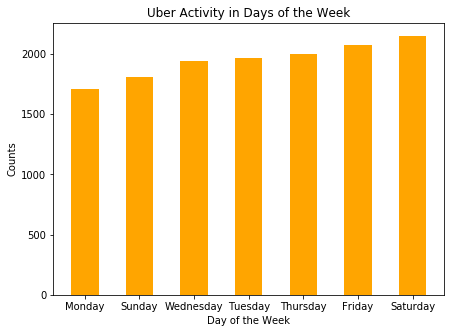

In [21]:
plt.figure(figsize=(7,5))
w = 0.5

plt.bar(day_of_week.index, day_of_week.values, width=w, color="orange")
plt.title('Uber Activity in Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Counts')

Assign (hardcode) the least and most popular days to different variables

In [0]:
least_popular = "Monday"
most_popular = "Saturday"

Submit your answer to the autograder as a tuple (least_popular, most_popular) (4 points)

In [23]:
#Penn grader entry
grader.grade(test_case_id = 'popularity_histogram', answer = (least_popular, most_popular))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 2: Working with Airbnb Data

Read in the AirBnB data similar to the Uber data.

Assign it to a variable named: "airbnb_df"

In [0]:
airbnb_df = pd.read_csv('airbnb_data_start.csv')

Do the same drop check as Uber with the duplicates and NaN values

For our test, take the first 75 rows of the cleaned airbnb data, save it to a variable and send that to the autograder. (3 points)

Name this 75 row df: "first_75"

**Make sure that when you grab the first 75 rows, you assign this to a new variable and not overwrite the original airbnb_df**

In [0]:
airbnb_df.drop_duplicates(inplace=True)
airbnb_df.dropna(axis=0, how='any', inplace=True)

first_75 = airbnb_df.iloc[:75,:]

In [26]:
#Penn grader entry
grader.grade(test_case_id = 'airbnb_drop', answer = first_75)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Nobody wants to stay in an AirBnB that has very few ratings. Seems very sketchy. Let's drop all the rows/listings that have less than 5 reviews.

Save this to a variable named: "airbnb_review_5_df"

In [0]:
airbnb_review_5_df = airbnb_df.loc[airbnb_df.number_of_reviews >= 5]

Pass in the filtered dataframe into the autograder (3 points)

In [28]:
#Penn grader entry
grader.grade(test_case_id = 'airbnb_filter', answer = airbnb_review_5_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###2.1 Get more data that you don't already have

In this case, we gave you a CSV that had zipcodes for AirBnbs. However, in the real world, you'll need to add additional data to your existing data. That's what we'll do here.

Read in airbnb_zipcode.csv into a dataframe and delete the columns that have NaN. You'll notice this data doesn't have a zipcode column. We want the zipcode for each row. Add a new column to the dataframe with the associated zipcode for the given longitude/latitude point. This can be achieved through using the latitude and longitude. Google around for ways to convert latitude/longitude points into a zipcode in Python. I suggest a few options:

* https://geopy.readthedocs.io/en/stable/

* https://developer.mapquest.com/

* https://stackoverflow.com/questions/54320931/python-code-for-reverse-geo-coding-using-google-api

This part can be a little challenging. Keep working at it and don't get discouraged! We believe in you. TAs are also here to help (office hours & Piazza)!

**Make sure the added zipcode column name is named "zipcode"**

Name the variable that you read in the data as: "airbnb_zip"

In [29]:
# drop columns with NaNs
airbnb_zipcode = pd.read_csv('airbnb_zipcode.csv')
airbnb_zipcode.dropna(axis=1,how='any',inplace=True)

import re

def get_zipcode(latlongi_string):
  '''request map reverse information using API and regex the text with wanted postcode pattern'''
  link_base = 'http://www.mapquestapi.com/geocoding/v1/reverse?key=KtWGHmvS0CEJpdygqsVZnI1DLShHFS4u&location='
  link = link_base+latlongi_string
  response = requests.get(link).text
  zip_regex = re.compile(r'"postalCode":".*?"')
  zip_output = zip_regex.search(response).group()[14:19]
  return zip_output

# create functional columns to generate unque url for each row
airbnb_zipcode['latitude1'] = airbnb_zipcode['latitude'].astype(str)
airbnb_zipcode['longitude1'] = airbnb_zipcode['longitude'].astype(str)
airbnb_zipcode['latlong'] = airbnb_zipcode['latitude1'] + ',' + airbnb_zipcode['longitude1']
# apply the get zipcode function and turn the variables into integers
airbnb_zipcode['zipcode'] = airbnb_zipcode['latlong'].apply(lambda x: get_zipcode(x))
airbnb_zipcode['zipcode'] = airbnb_zipcode['zipcode'].astype(int)

# drop temporary columns and make a copy of the dataframe
airbnb_zipcode.drop(columns=['latitude1','longitude1','latlong'], inplace=True)
airbnb_zip = airbnb_zipcode
airbnb_zip

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,zipcode
0,0,Brooklyn,Crown Heights,40.67780,-73.94339,single,100,11216
1,1,Brooklyn,Bedford-Stuyvesant,40.68317,-73.94701,single,70,11216
2,2,Brooklyn,Crown Heights,40.67610,-73.95290,single,110,11216
3,3,Brooklyn,Crown Heights,40.67586,-73.95155,single,60,11216
4,4,Manhattan,Little Italy,40.71702,-73.99811,whole,90,10013
...,...,...,...,...,...,...,...,...
70,70,Brooklyn,Greenpoint,40.73813,-73.95394,single,179,11222
71,71,Brooklyn,Crown Heights,40.67591,-73.94715,whole,150,11216
72,72,Manhattan,East Village,40.72843,-73.98895,whole,139,10003
73,73,Manhattan,Two Bridges,40.71271,-73.99776,single,95,10038


Depending on the method you used to obtain the zipcode, you might have rows with a zipcode that look like "11216-2813". We only care about what's before the "-". If a row already has a zipcode that is only 5 numbers (i.e. 11216), then we want to leave it how it is.

Fix your dataframe from the previous step so that the zipcode column only has the 5 numbers for each zipcode.

For our test, make sure the zipcode column is all ints. Once you make sure that the zipcode column is ints, submit the newly made dataframe with the extra zipcode column. Double check that you named the extra column what we want it to be. (13 points)

In [30]:
#Penn grader entry
grader.grade(test_case_id = 'airbnb_zip', answer = airbnb_zip)

Correct! You earned 13/13 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 3: Combining the data

When you become a full time data scientist, a lot of times, data will be spread out across multiple files/tables. The way to combine these tables is through join/merge operations. If you're familiar with SQL, this will be very familiar to you. If not, don't worry. I believe in you!

To start, here's a nice diagram which shows you the different types of joins


<p align = "center">
<img src = "https://i.stack.imgur.com/hMKKt.jpg" width= "600" align ="center"/>
</p>

A clarifying point: The two venn diagrams with the "(if Null)" are also called Left Outer Join and Right Outer Join



Now, we want all the zipcodes that don't appear in both datasets (If 11111 is in uber data and airbnb data, we don't want it. If 22222 is in uber data but not in airbnb, we want to keep it. If 33333 is in airbnb data but not in uber, we want to keep it). In other words, we want all the zipcodes that have airbnbs where an Uber has never dropped someone off at those zipcodes and all Ubers that have dropped people off at zipcodes where no AirBnB exists (this is probably impossible in the real world, but our data is a small sample of the real world). 

Hint: Google around for Exclusive Full Joins

We want the final answer as a two column dataframe with columns named: uber_zips, airbnb_zips. Uber_zips should contain the zipcodes that only exist within the uber dataset and vice-a-versa for airbnb_zips column. To clarify, this means if there is a row where airbnb_zip has a zipcode, that same row should not have an uber_zip entry(Should be NaN) as otherwise, that means that zipcode is shared between both datasets

Make sure your final answer dataframe is named: "combined_df"

In [0]:
# using left and right merge to label with complementary set with nan value
uber_airbnb_left = uber_df.merge(airbnb_df, how='left', left_on='dropoff_zip', right_on='zipcode')
uber_airbnb_right = uber_df.merge(airbnb_df, how='right', left_on='dropoff_zip', right_on='zipcode')

# create an empty dataframe to store data
combined = {'uber_zips':[],
            'airbnb_zips':[]}
combined_df = pd.DataFrame(combined)

# take complementary sets by looking for nan
ua_left = uber_airbnb_left[uber_airbnb_left.zipcode.isna()]
ua_right = uber_airbnb_right[uber_airbnb_right.dropoff_zip.isna()]

# store values in dataframe and remove duplicates
combined_df['uber_zips'] = ua_left['dropoff_zip']
combined_df['airbnb_zips'] = ua_right['zipcode']
combined_df.drop_duplicates(inplace=True)

Submit the above specified 2 column dataframe to the autograder (12 points)

In [32]:
grader.grade(test_case_id = 'join_test', answer = combined_df)

Correct! You earned 12/12 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 4: Exploring AirBnBs and Zillow

Read in the Zillow CSV into a dataframe. If you view the dataframe, you might notice that this csv/dataframe has a lot more NaNs than the AirBnb/Uber data. Soooo let's do the same thing we did with AirBnB and Uber and drop the NaNs and duplicates.

Name the dataframe: zillow_df

In [0]:
zillow_df = pd.read_csv('zillow_data_start.csv')
zillow_df.drop_duplicates(inplace=True)
zillow_df.dropna(how='any', inplace=True)

Submit the cleaned zillow dataframe to the autograder (3 points)

In [34]:
#Penn Grader entry
grader.grade(test_case_id = 'zillow_drop', answer = zillow_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [35]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28522 entries, 0 to 84547
Data columns (total 14 columns):
BOROUGH                      28522 non-null object
NEIGHBORHOOD                 28522 non-null object
BUILDING CLASS CATEGORY      28522 non-null object
BLOCK                        28522 non-null int64
LOT                          28522 non-null int64
BUILDING_CLASS_AT_PRESENT    28522 non-null object
ADDRESS                      28522 non-null object
ZIPCODE                      28522 non-null float64
LAND_SQUARE_FEET             28522 non-null float64
GROSS_SQUARE_FEET            28522 non-null float64
YEAR_BUILT                   28522 non-null float64
SALE_PRICE                   28522 non-null float64
SALE_DATE                    28522 non-null object
id                           28522 non-null int64
dtypes: float64(5), int64(3), object(6)
memory usage: 3.3+ MB


##4.1 Correlation Matrix

We want to see if, on average, there is any correlation between the gross square footage of apartments versus airbnb prices for shared zipcodes, and if there is a correlation, how strong is it?

This can be broken into several steps:

1. Find the average value of each column for each zipcode within Zillow

2. Find the average value of each column for each zipcode within AirBnb

3. Merge them on the matching column.
  Your merged table now has 3 nonsense columns. That is, since the values have been averaged by zipcode, these columns no longer include valid information... think on it and visit office hours if you get stuck! Identify and drop these (can also be done in steps 1 and 2).

4. Generate the correlation matrix. Find the value associated with Zillow Gross Square footage vs Airbnb Price

Hint: Read about Pandas "corr()" function.

**You can correctly answer the following section just using Zillow's gross square footage column and Airbnb's price column but after this question, we want to plot a correlation matrix which will require all the columns(not just the two listed above)**

Name your final answer correlation matrix dataframe to: "correlation_matrix"

In [36]:
zillow_mean = zillow_df.groupby(by='ZIPCODE').mean()
airbnb_mean = airbnb_df.groupby(by='zipcode').mean()
zillow_airbnb = zillow_mean.merge(airbnb_mean, how='inner', left_on=zillow_mean.index, right_on=airbnb_mean.index)
zillow_airbnb.drop(columns=['id_x','id_y','host_id'], inplace=True)

correlation_matrix = zillow_airbnb.corr(method='pearson')
correlation_matrix.rename(columns={'GROSS_SQUARE_FEET':'Zillow_GROSS_SQUARE_FEET', 'price':'Airbnb_price'}, inplace=True)
correlation_matrix

,key_0,BLOCK,LOT,LAND_SQUARE_FEET,Zillow_GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,latitude,longitude,Airbnb_price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
key_0,1.000000,0.610283,-0.111614,-0.268238,-0.314787,0.079247,-0.298540,-0.398480,0.551096,-0.356521,-0.450542,0.228293,0.332995,-0.334814,0.333924
BLOCK,0.610283,1.000000,-0.000170,-0.141402,-0.237998,0.233650,-0.234486,-0.353179,0.577455,-0.297214,-0.444935,0.201525,0.365334,-0.197880,0.471887
LOT,-0.111614,-0.000170,1.000000,0.242259,-0.020067,0.335491,-0.025537,0.102329,-0.013973,-0.078731,0.040121,-0.094617,-0.086840,-0.092304,-0.043803
LAND_SQUARE_FEET,-0.268238,-0.141402,0.242259,1.000000,0.537471,0.221794,0.336105,0.137775,-0.118233,0.024285,0.054639,-0.098148,-0.095575,0.143672,-0.178614
GROSS_SQUARE_FEET,-0.314787,-0.237998,-0.020067,0.537471,1.000000,0.175736,0.922209,0.047076,-0.172018,0.250503,0.248059,-0.149194,-0.156892,0.534339,-0.164858
YEAR_BUILT,0.079247,0.233650,0.335491,0.221794,0.175736,1.000000,0.233948,-0.252755,-0.025818,-0.172988,-0.222033,0.046124,0.137312,0.090607,0.332937
SALE_PRICE,-0.298540,-0.234486,-0.025537,0.336105,0.922209,0.233948,1.000000,0.006009,-0.180997,0.288503,0.261104,-0.149162,-0.162949,0.551779,-0.158165
latitude,-0.398480,-0.353179,0.102329,0.137775,0.047076,-0.252755,0.006009,1.000000,0.349127,-0.096914,0.123208,-0.000256,-0.052404,0.064450,-0.135522
longitude,0.551096,0.577455,-0.013973,-0.118233,-0.172018,-0.025818,-0.180997,0.349127,1.000000,-0.326864,-0.335525,0.241179,0.329785,-0.124773,0.324480
price,-0.356521,-0.297214,-0.078731,0.024285,0.250503,-0.172988,0.288503,-0.096914,-0.326864,1.000000,0.368324,-0.234551,-0.305022,0.362155,-0.301777


After the join, the columns might be confusing. Rename the two columns that we are interested in to: 
'Zillow_GROSS_SQUARE_FEET' and 'Airbnb_price'. 

Submit the correlation matrix to the autograder 
(5 points)

In [37]:
#Penn grader entry
grader.grade(test_case_id = 'corr_mat', answer = correlation_matrix)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Here we provide code for you to visualize the correlation matrix. In the following code snippet below, please assign your correlation matrix to the variable named "corr" and then run the cell. You should see a correlation matrix

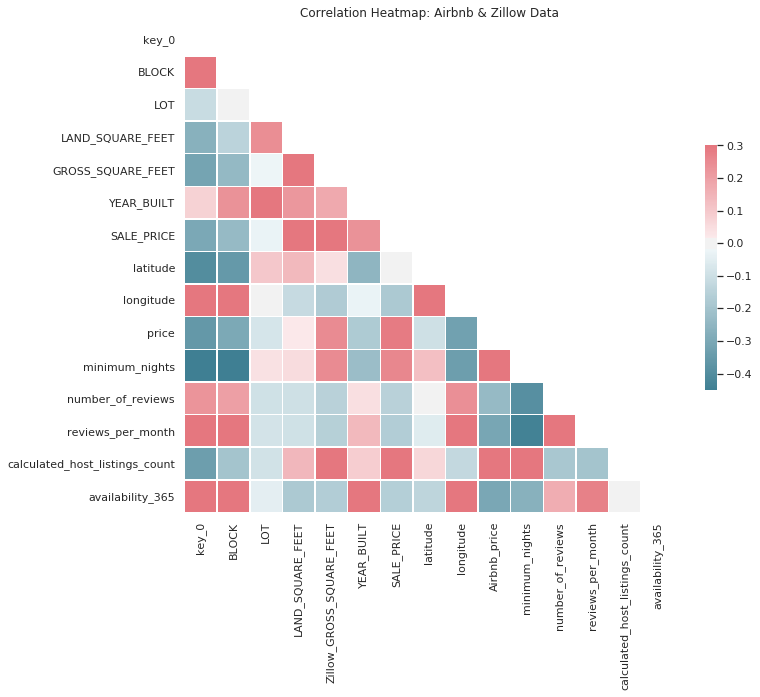

In [38]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
#ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap: Airbnb & Zillow Data")
plt.show()

##4.2 Joining columns on roughly similar data

**This problem is pretty difficult conceptually. But if my dumb self can get into this school, I know you can do this. Don't get discouraged! Ask questions on Piazza/come to OH!**

There will be times when you have similar (but not exact) data between columns that you would like to join on. Convential joins, like the one you did above, will scan through each of the specified join columns, and find **exact** matches to establish that the rows from the associated datasets can be combined together into one row. But what happens if the join operation sees "Mr.Smith" in one dataset versus "Mr Smith"? It will skip over and think these two entries can't be joined even though there is a minor difference and the two values should be matched. This is where we combine n-grams with Jaccard Simalirty.

This sounds scary but I'll break it down. An n-gram is a contiguous sequence of n items. An example would be given the sentence: "Craig has a 2.2 GPA" ... If we were looking at an n-gram of two, the results would be: ["Craig has", "has a", "a 2.2", "2.2 GPA"] (I swear my GPA isn't that. It's lower.)

The above example is tokenizing/breaking up the n-grams by spaces. However, we can also do it characterwise. Given "Craig has a 2.2 GPA" with n-gram of 2 and doing characterwise splits, we will have: ["Cr", "ra", "ai", "ig", " h", "ha" ...]


Jaccard similarity is a way to measure similarity between two sets. I recommend Googling around for more clarification but here is the notation for it: 

<p align = "center">
<img src = "https://i.ytimg.com/vi/Ah_4xqvS1WU/maxresdefault.jpg" width= "600" align ="center"/>
</p>



_________

We will focus on the "NEIGHBORHOOD" column in zillow_df and the "neighbourhood" in airbnb_df. If you take a look, these two columns share the same type of information but are formatted differently (i.e. "UPPER WEST SIDE (59-79)" in zillow_df versus "Upper West Side" in airbnb_df. We know these columns mean very similar things but merge/join operations don't. A possibility is to clean that column so that the formats match. But what if you have a ton of entries and you can't possibly account for everything?

Our goal here is to join the neighbourhood columns without having to perform extensive cleaning operations in one of the columns.

This can be broken down into:

1. Take your zillow_df NEIGHBORHOOD column and lowercase all the entries except the first entry (aka capitalize). We do this to make the neighborhood columns between the two datasets as similar as possible without needing extensive cleaning.

2. Define a Tokenizer with 5 grams. We have already imported our recommended library to do this at the top. I suggest looking at this for how to define a tokenzier: http://anhaidgroup.github.io/py_stringmatching/v0.2.x/QgramTokenizer.html

3. Do a jaccard join. Again, we have already imported our recommended library for doing this at the top. Look here for documentaiton on how to do it: http://anhaidgroup.github.io/py_stringsimjoin/v0.1.x/api/jaccard_join.html ... When calling this function, set the l_out_attrs and r_out_attrs parameters to their associated table's neighbourhood column so that we keep those columns as we want to see our join results

4. When selecting the tolerance, play around with some values between .1 < x < .4 to see what the join thinks could be joinable

5. Drop duplicates from your jaccard-joined dataframe based on both neighbourhood columns as you will have a lot of duplicates. In other words, you might have 100+ entries of ["MURRAY HILL", "MURRAY HILL"]. We only want one entry for this.

Name your answer to this section: "answer_df"

In [39]:
zillow_df['NEIGHBORHOOD'] = zillow_df['NEIGHBORHOOD'].str.capitalize()

tok = sm.QgramTokenizer(qval=5,return_set=True)
answer_df = ssj.jaccard_join(zillow_df, airbnb_df, 'id', 'id', 'NEIGHBORHOOD', 'neighbourhood', tok, 0.35, 
                                l_out_attrs=['NEIGHBORHOOD'], r_out_attrs=['neighbourhood'])

answer_df.drop(columns=['_id','l_id','r_id'], inplace=True)
answer_df.drop_duplicates(inplace=True)
answer_df

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:18


,l_NEIGHBORHOOD,r_neighbourhood,_sim_score
0,Kensington,Kensington,1.000000
39,Midtown cbd,Midtown,0.368421
48,Midtown east,Midtown,0.350000
65,Midtown west,Midtown,0.350000
143,Clinton,Clinton Hill,0.350000
...,...,...,...
3757490,Mill basin,Mill Basin,0.473684
3790425,Hollis,Hollis,1.000000
3790726,Hollis hills,Hollis,0.368421
4319572,Arden heights,Arden Heights,0.545455


Find a row entry in this dataframe where the airbnb and zillow neighborhoods aren't the same but are similar (i.e "Clinton" vs "Clinton Hill" or "Mill basin" vs "Mill Basin". Assign (You can manually type it out) the associated name to the following variables based on the dataset they originally belonged to.

When you submit your answer to the autograder, make it a tuple of (result dataframe from the join, airbnb_neighborhood, zillow_neighborhood). (14 points)

In [0]:
airbnb_neighborhood = "Midtown"
zillow_neighborhood = "Midtown cbd"

answer = (answer_df, airbnb_neighborhood, zillow_neighborhood)

In [41]:
#Penn grader entry
grader.grade(test_case_id = 'jaccard_join', answer = answer)

Correct! You earned 14/14 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 5 XPath
###Brought to you by popular demand from students...

So far, we've looked at data from Airbnb, Uber, and Zillow. What do Airbnb and Uber have in common? They both were/are unicorn startups! 
According to Wikipedia, a unicorn is a privately held startup company with a current valuation of US$1 billion or more. Important to know for if/when you recruit for jobs!

Also, while we're on the topic of pandas and unicorns:

<p align = "center">
<img src = "https://ih0.redbubble.net/image.470874856.3122/flat,750x,075,f-pad,750x1000,f8f8f8.jpg" width= "200" align ="center"/>
</p>

Let's look into unicorn startup companies some more. Take a look at this wikpedia page that has a full list of unicorn startup companies. https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies. <br>
Uber is on the former unicorns list due to IPO and Airbnb is still considered a unicorn. 


Using this data, return a dataframe that has the top 50 unicorn companies by Valuation. Your dataframe should be 
1. In descending order by Valuation. 
2. Have exactly two columns, "Company" and "Valuation". 

Hint: The first row should be: Ant Financial, 150. 

There are many different ways to do this but we recommend trying it with XPath. P.S. If you come to OH for help, we will mostly only know how to do it using the XPath way. (9 points)

Assign the answer of this section to a dataframe named: "answer_df"

In [42]:
from lxml import etree

unicorn_dict = {'Company':[],
                'Valuation':[]}
pd.DataFrame(columns=['Company', 'Valuation'])
web = 'https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies'

response = requests.get(web)
unicorn = etree.HTML(response.content.decode("utf-8"))
unicorn_table = unicorn.xpath('/html/body/div[3]/div[3]/div[4]/div/table[2]/tbody')

for i in unicorn_table:
  name = i.xpath("//td[1]/a/text()")[0:50]
  value = i.xpath("//td[2]/text()")[6:56]
  unicorn_dict['Company'] = name
  unicorn_dict['Valuation'] = value

unicorn_df = pd.DataFrame(unicorn_dict)
unicorn_df['Valuation'] = unicorn_df['Valuation'].apply(lambda x: x[0:-1])
unicorn_df['Company'] = unicorn_df['Company'].astype(str)
unicorn_df['Valuation'] = unicorn_df['Valuation'].astype(str)


answer_df = unicorn_df
answer_df.reindex()
answer_df

xpath_str = '/html/body/div[3]/div[3]/div[4]/div/table[2]/tbody/tr/td[1]/a/text()'

answer_df

,Company,Valuation
0,Ant Financial,150
1,Bytedance,78.0
2,DiDi,51.6
3,Airbnb,38.0
4,Stripe,35.0
5,SpaceX,33.3
6,Lufax,30.0
7,JUUL Labs,24.0
8,Cainiao,20.0
9,Palantir Technologies,20.0


In [43]:
#Penn grader entry
grader.grade(test_case_id = 'xPath_test', answer = (answer_df, xpath_str))

Correct! You earned 9/9 points. You are a star!

Your submission has been successfully recorded in the gradebook.


You're done! You are now a master data wrangler. Yeehaw!

<p align = "center">
<img src = "https://compendiumofcountries.org/wiki/images/6/68/Data_Wrangler_-_Gaucho.png" width= "200" align ="center"/>
</p>

This image shows up on google images when you search for "data wrangler". 

# HW Submission

The good news is you basically know the score you already got because of the autograder. 
**Double check that you have the correct PennID (all numbers) in the autograder**. 

However, we will still double check your notebook to check for plagarism. Again, do not cheat. Go to the "File" tab at the top left, and click "Download .ipynb". Zip it (name shouldn't matter) and submit it to OpenSubmit. 

You must submit your notebook to receive credit.

**On OpenSubmit, go to Settings and make sure to set your Student ID to your PennID (all numbers)**.

Lastly, enjoy this picture of what true love is

<p align = "center">
<img src = "https://www.dataquest.io/wp-content/uploads/2019/01/6990634-panda-hug-832x520.jpg" width= "600" align ="center"/>
</p>